<style>
#notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0);
</style>

# Корпорации РФ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

**Примечание:**

В данном расчете данные Госкорпораци "Росатом" учитываются совокупно, Госкорпорация "Ростех" учитывается раздельно по ключевым предприятиям. Расчет с учетом консолидированной отчетности ГК "Ростех" будет приведен отдельно.

Данные по Концерну ВПО "Алмаз-Антей" приняты по данным рейтинга "Эксперт ТОП-400" (22 позиция рейтинга). <a href="https://expert.ru/dossier/rating/expert-400/">Источник</a>

In [2]:
df = pd.read_excel('C:\\Users\\yraz\\Enterprises\\data\\data.xlsx')
print("Количество компаний: ", len(df.name), ' компания')
print('Первые 5 компаний')
df.head()

Количество компаний:  661  компания
Первые 5 компаний


,name,city,industry,v,v2013,v2014,v2015,v2016,v2017,p2013,p2014,p2015,p2016,p2017,forg,country
0,Газпром,Москва,Нефть и газ,6546,5119.0,5477.0,6073.0,6111.0,6546.0,459500.0,459600.0,462400.0,467400.0,463000.0,0,Россия
1,ЛУКОЙЛ,Москва,Нефть и газ,5475,3794.0,4697.0,5174.0,4744.0,5475.0,109600.0,110300.0,106200.0,105500.0,103600.0,0,Россия
2,Роснефть,Москва,Нефть и газ,5030,3176.0,3681.0,4120.0,4134.0,5030.0,228000.0,248900.0,261500.0,NaN,302100.0,0,Россия
3,Сбербанк России,Москва,Финансы,3133,1763.0,2234.0,2911.0,3059.0,3133.0,306123.0,329566.0,330677.0,325075.0,310300.0,0,Россия
4,Российские железные дороги,Москва,Транспорт,2252,1774.0,1796.0,1991.0,2133.0,2252.0,902000.0,835000.0,809000.0,774000.0,755000.0,0,Россия


Всего компаний в списке ведущих предприятий        :  661 

Суммарная выручка компаний списка за 2017 год      :  82306 млрд.руб.
Половина суммы выручки компаний списка за 2017 год :  41153 млрд.руб.

Суммарная выручка компаний списка за 2017 год      :  82.306 трлн.руб.
Половина суммы выручки компаний списка за 2017 год :  41.153 трлн.руб.


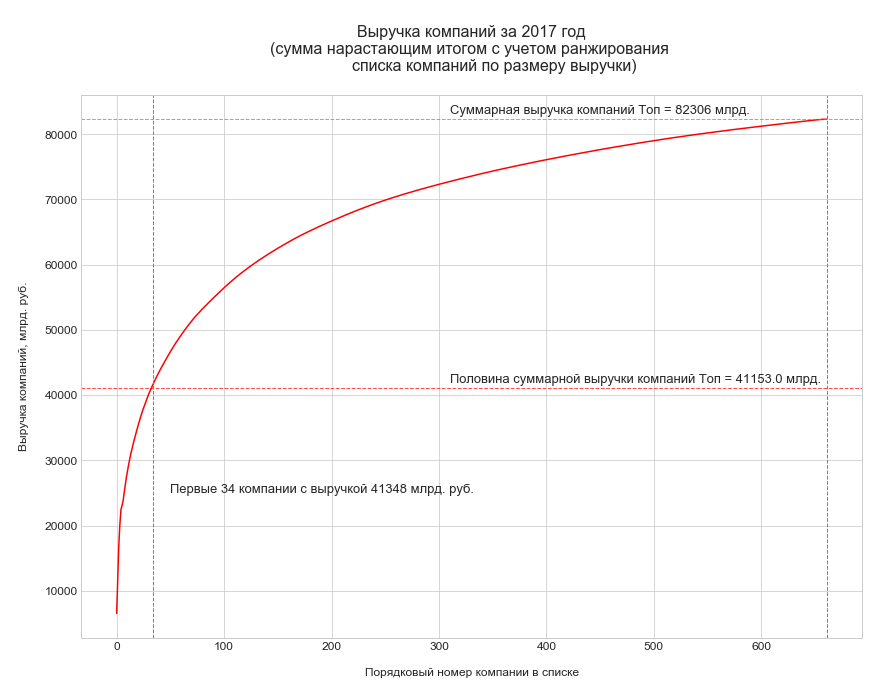

In [3]:
print('Всего компаний в списке ведущих предприятий        : ', len(df['name']), '\n')
print('Суммарная выручка компаний списка за 2017 год      : ', df['v'].sum(), 'млрд.руб.')
print('Половина суммы выручки компаний списка за 2017 год : ', int(df['v'].sum()/2), 'млрд.руб.')
print('\nСуммарная выручка компаний списка за 2017 год      : ', df['v'].sum()/1000, 'трлн.руб.')
print('Половина суммы выручки компаний списка за 2017 год : ', df['v'].sum()/2/1000, 'трлн.руб.')

vvp_2017 = 97000
sum_2017 = df.v2017.sum()
cumsum = df.v.cumsum()
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(14, 10))
plt.title('''\nВыручка компаний за 2017 год\n(сумма нарастающим итогом с учетом ранжирования 
          списка компаний по размеру выручки)\n''', fontsize=16)
plt.plot(cumsum, color='red')

plt.axvline(len(df.v2017), linestyle='--', color='grey', linewidth=1)
plt.axhline(sum(df.v), linestyle='--', color='grey', alpha=0.7, linewidth=1)
plt.axhline(sum(df.v)/2, linestyle='--', color='red', alpha=0.7, linewidth=1)
plt.ylabel('\nВыручка компаний, млрд. руб.\n', fontsize=12)

plt.xlabel('\nПорядковый номер компании в списке\n', fontsize=12)
plt.text(310, sum(df.v)+sum(df.v/100), "Суммарная выручка компаний Топ = " + str(sum(df.v)) + ' млрд.', fontsize=13)
plt.text(310, sum(df.v/2)+sum(df.v/100), "Половина суммарной выручки компаний Топ = " + str(sum(df.v)/2) + ' млрд.', 
         fontsize=13)
plt.text(50, 25000, 'Первые 34 компании с выручкой '+str(df[:33].v.sum())+' млрд. руб.', fontsize=13)
plt.axvline(df.index[33], linestyle='--', color='grey', linewidth=1)

plt.yticks(fontsize=12);
plt.xticks(fontsize=12);
plt.show()

Выручка компаний складывается нарастающим итогом с учетом ранжирования списка компаний по размеру выручки в убывающем порядке


Суммарная выручка компаний Топ 34              :  41.348  трлн.руб.
Общее количество персонала в компаниях Топ 34  :  4454719 человек.


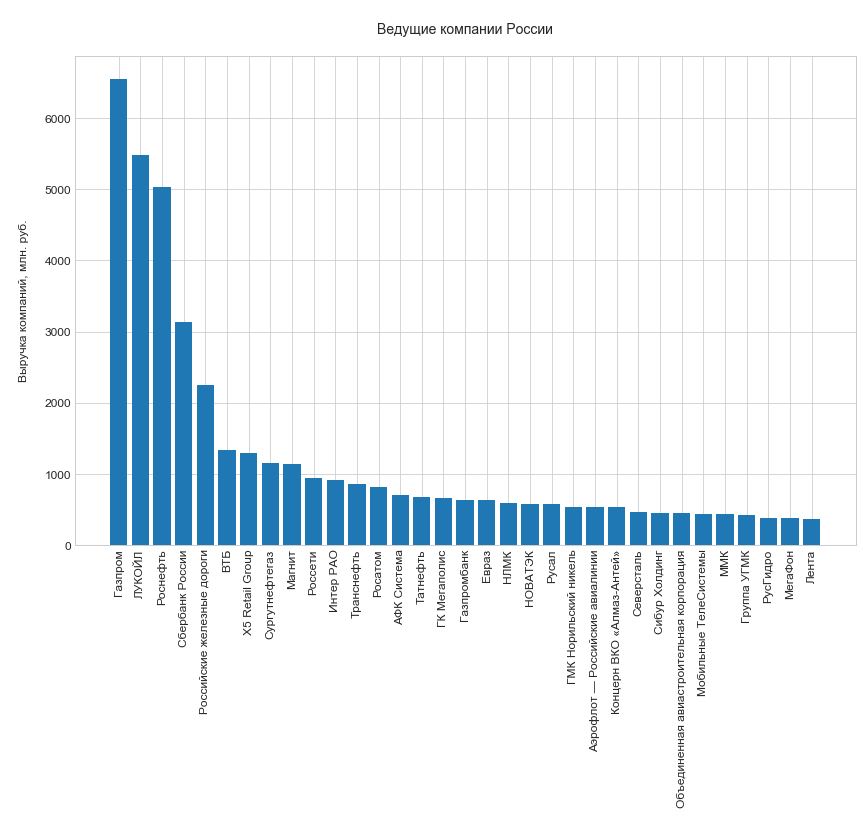

In [4]:
print('\nСуммарная выручка компаний Топ 34              : ', df[:33].v.sum()/1000, ' трлн.руб.')
print('Общее количество персонала в компаниях Топ 34  : ', int(df[:33].p2017.sum()), 'человек.')
plt.figure(figsize=(14, 9))
plt.title('\nВедущие компании России\n', fontsize=14)
plt.bar(df[:33].name, df[:33].v)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('\nВыручка компаний, млн. руб.\n', fontsize=12)
plt.yticks(fontsize=12);


Общее количество персонала в компаниях Топ 34:  4454719  человек.


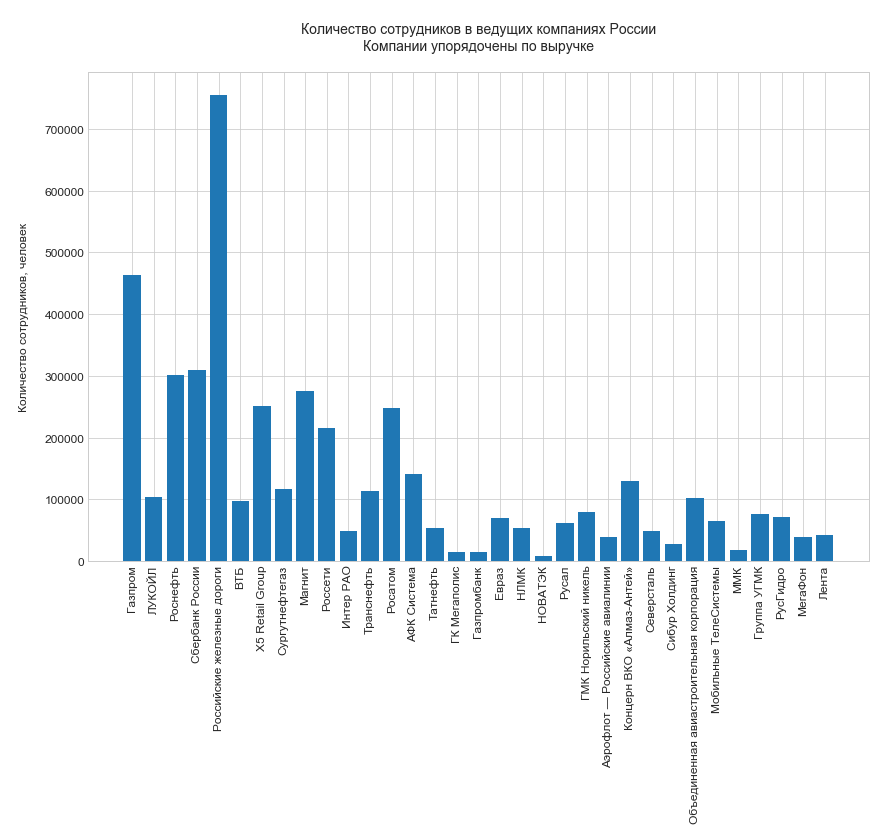

In [5]:
print('\nОбщее количество персонала в компаниях Топ 34: ', int(df[:33].p2017.sum()), ' человек.')
plt.figure(figsize=(14, 9))
plt.title('\nКоличество сотрудников в ведущих компаниях России\n'
          'Компании упорядочены по выручке\n', fontsize=14)
plt.bar(df[:33].name, df[:33].p2017)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('\nКоличество сотрудников, человек\n', fontsize=12)
plt.yticks(fontsize=12);

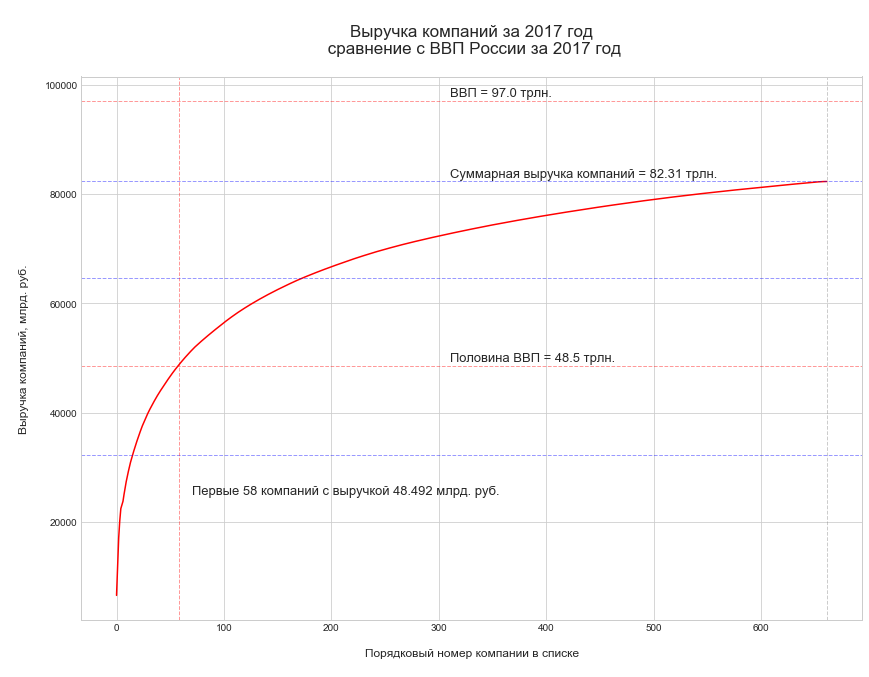

In [6]:
vvp_2017 = 97000
sum_2017 = df.v2017.sum()
cumsum = df.v.cumsum()
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(14, 10))
plt.title("\nВыручка компаний за 2017 год\n сравнение с ВВП России за 2017 год\n", fontsize=17)
plt.plot(cumsum, color='red')
plt.axvline(len(df.v2017), linestyle='--', color='grey', alpha=0.4, linewidth=1)
plt.axhline(vvp_2017, linestyle='--', color='red', alpha=0.4, linewidth=1)
plt.axhline(vvp_2017/2, linestyle='--', color='red', alpha=0.4, linewidth=1)
plt.axhline(vvp_2017/3, linestyle='--', color='blue', alpha=0.4, linewidth=1)
plt.axhline((vvp_2017/3)*2, linestyle='--', color='blue', alpha=0.4, linewidth=1)
plt.axhline(sum(df.v), linestyle='--', color='blue', alpha=0.4, linewidth=1)
plt.ylabel('\nВыручка компаний, млрд. руб.\n', fontsize=12)
plt.xlabel('\nПорядковый номер компании в списке\n', fontsize=12)
plt.text(310, sum(df.v)+sum(df.v/100), "Суммарная выручка компаний = " + str(round(sum(df.v/1000), 2)) + ' трлн.', 
         fontsize=13)
plt.text(310, vvp_2017/2+vvp_2017/100, "Половина ВВП = " + str((vvp_2017/2)/1000) + ' трлн.', fontsize=13)
plt.text(310, vvp_2017+vvp_2017/100, "ВВП = " + str((vvp_2017)/1000) + ' трлн.', fontsize=13)
plt.text(70, 25000, 'Первые 58 компаний с выручкой '+str(df[:57].v.sum()/1000)+' млрд. руб.', fontsize=13)
plt.axvline(df.index[57], linestyle='--', color='red', alpha=0.4, linewidth=1)
plt.show()

Cуммарная выручка 58 компаний списка:  48492 млрд. руб.
Cуммарная выручка 58 компаний списка:  48.492 трлн. руб.


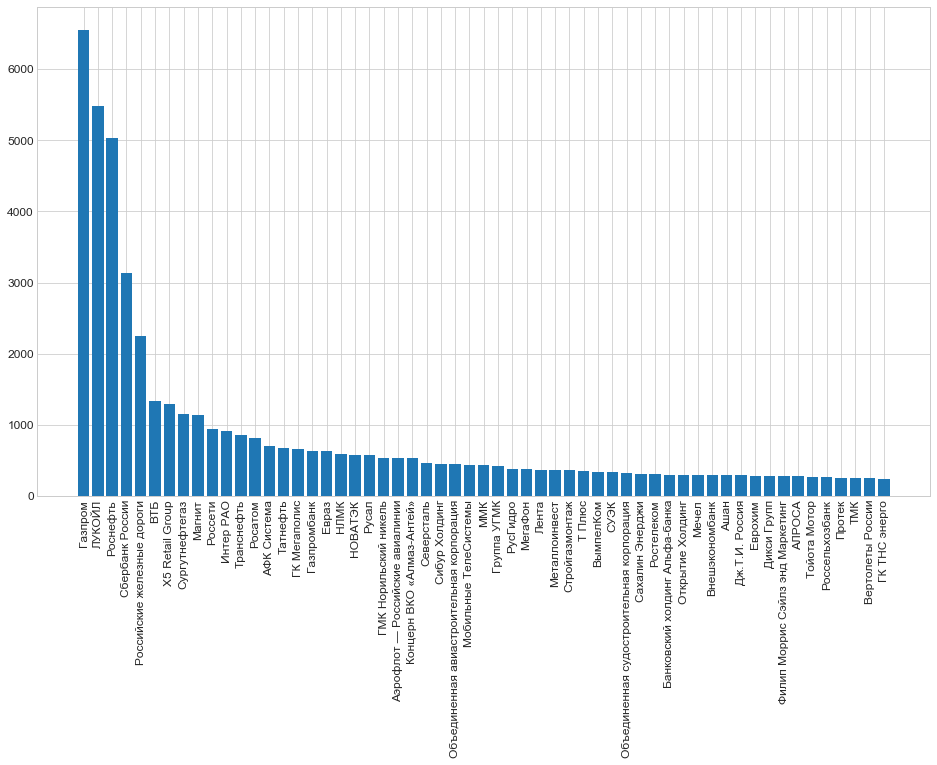

In [7]:
print('Cуммарная выручка 58 компаний списка: ', df[:57].v.sum(), 'млрд. руб.')
print('Cуммарная выручка 58 компаний списка: ', df[:57].v.sum()/1000, 'трлн. руб.')
plt.figure(figsize=(16, 9))
plt.bar(df[:57].name, df[:57].v);
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12);

Cуммарная выручка 58 компаний списка:  48.492 трлн. руб.
Cуммарная выручка 58 компаний списка:  5161587 человек


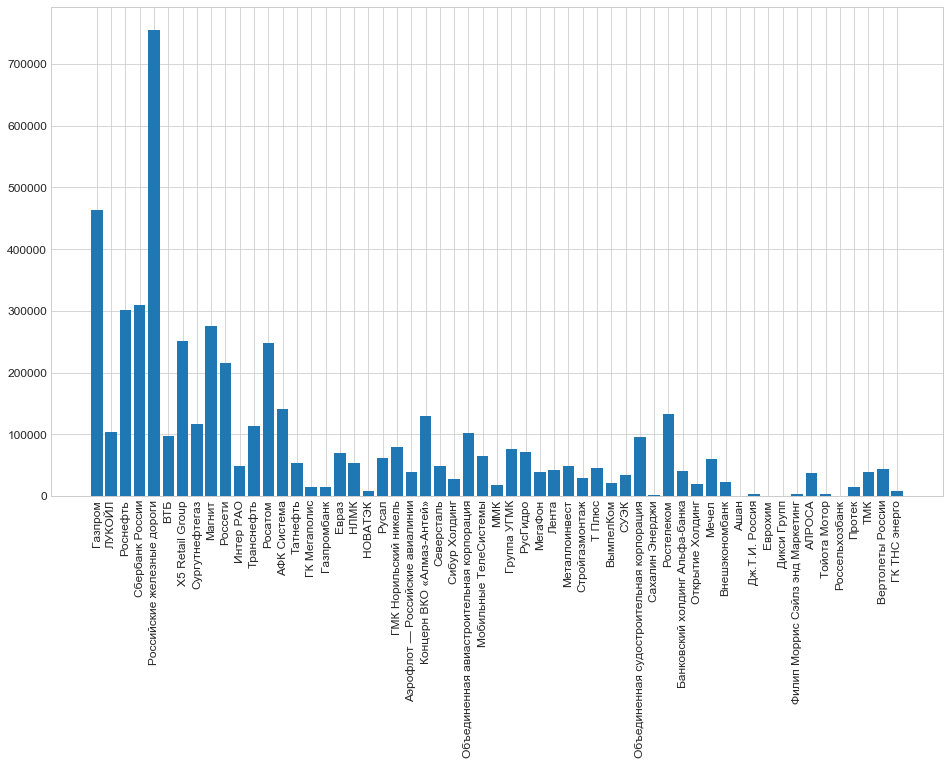

In [8]:
print('Cуммарная выручка 58 компаний списка: ', df[:57].v.sum()/1000, 'трлн. руб.')
print('Cуммарная выручка 58 компаний списка: ', int(df[:57].p2017.sum()), 'человек')
plt.figure(figsize=(16, 9))
plt.bar(df[:57].name, df[:57].p2017);
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12);

# Компании, обеспечивающие 50% ВВП сгруппированы по отраслям

In [9]:
industry = df[:57]
industry = industry.groupby('industry').sum()
industry = industry.sort_values('v', ascending=False)
industry

,v,v2013,v2014,v2015,v2016,v2017,p2013,p2014,p2015,p2016,p2017,forg
industry,,,,,,,,,,,,
Нефть и газ,20640,14580.0,16646.0,18542.0,18235.0,20640.0,1000241.0,1021747.0,1143313.0,866922.0,1163454.0,0
Финансы,6266,3662.0,4584.0,5991.0,6189.0,6266.0,466257.0,518624.0,535752.0,506889.0,505667.0,0
Металлы и горная добыча,5178,3255.0,3699.0,4375.0,4597.0,5178.0,665767.0,708051.0,662167.0,568436.0,625305.0,0
Торговля,3380,1708.0,2135.0,2629.0,3059.0,3380.0,412898.0,460051.0,511894.0,513186.0,569530.0,1
Электроэнергетика,2845,2121.0,2301.0,2473.0,2718.0,2845.0,414969.0,410374.0,398423.0,391959.0,387096.0,0
Транспорт,2785,2065.0,2116.0,2406.0,2629.0,2785.0,932500.0,867200.0,843000.0,810600.0,793900.0,0
ОПК и машиностроение,1558,765.0,775.0,912.0,933.0,1026.0,170721.0,179320.0,189617.0,239221.0,370204.0,0
Телекоммуникации,1462,1371.0,1380.0,1411.0,1405.0,1462.0,296822.0,292287.0,252752.0,244305.0,259526.0,0
Атомная промышленность,821,529.0,618.0,821.0,878.0,821.0,255300.0,255000.0,256600.0,249940.0,247300.0,0


Количество персонала в компаниях обеспечивающих 50% ВВП:  5161587 человек


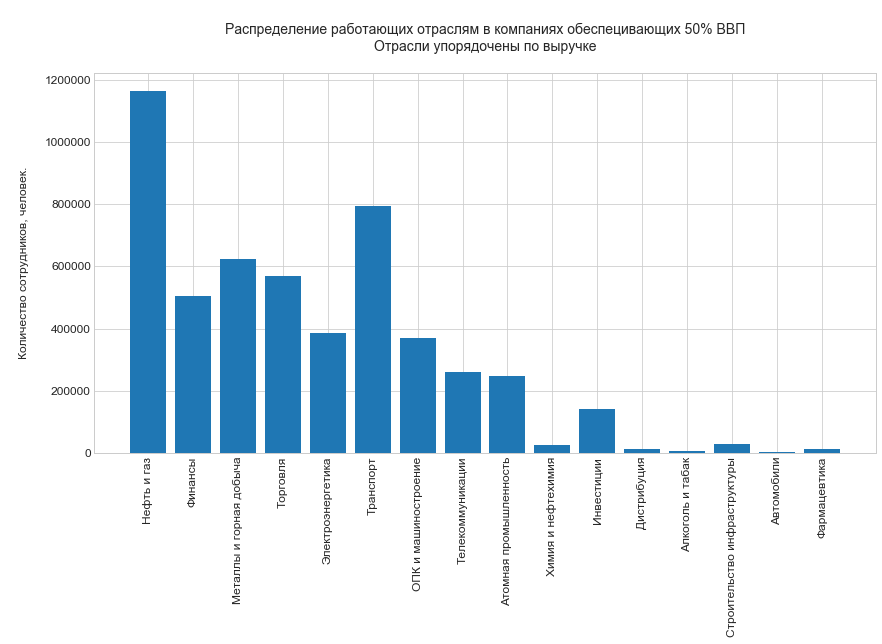

In [10]:
print('Количество персонала в компаниях обеспечивающих 50% ВВП: ', int(df[:57].p2017.sum()), 'человек')
plt.figure(figsize=(14, 7))
plt.title('\nРаспределение работающих отраслям в компаниях обеспецивающих 50% ВВП\n'
          'Отрасли упорядочены по выручке\n', fontsize=14)
plt.bar(industry.index, industry.p2017);
plt.ylabel('\nКоличество сотрудников, человек.\n', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12);

Количество персонала в компаниях обеспечивающих 50% ВВП:  5161587 человек


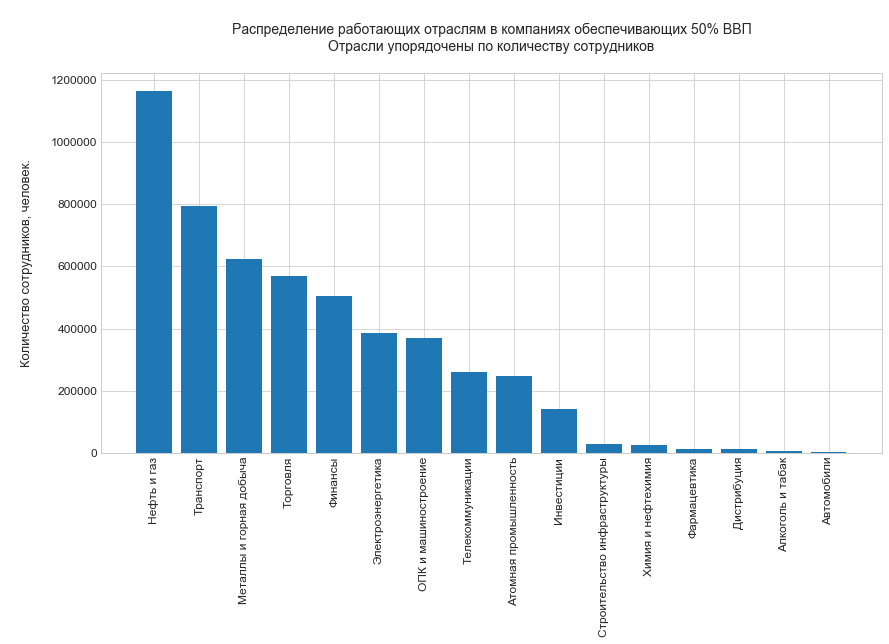

In [11]:
industry = industry.sort_values('p2017', ascending=False)
print('Количество персонала в компаниях обеспечивающих 50% ВВП: ', int(df[:57].p2017.sum()), 'человек')
plt.figure(figsize=(14, 7))
plt.title('\nРаспределение работающих отраслям в компаниях обеспечивающих 50% ВВП\n'
          'Отрасли упорядочены по количеству сотрудников\n', fontsize=14)
plt.bar(industry.index, industry.p2017);
plt.ylabel('\nКоличество сотрудников, человек.\n', fontsize=13)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12);